In [4]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class simple_simulator:
    
    def __init__(self,params=None):
        if params is None:
            self.v_ex = 2000
    #         self.payload = params['payload']
            self.drymass = 0.8e6
            self.fuelmass = 2e6
            self.diam = 1.65
    #         self.isp0 = params['isp0']
            self.dMdt = 1.4e4
        else:

            self.v_ex = params['v_ex']
    #         self.payload = params['payload']
            self.drymass = params['drymass'] + params['payload']
            self.fuelmass = params['fuelmass']
            self.diam = params['diam']
    #         self.isp0 = params['isp0']
            self.dMdt = params['dMdt']
    
    def get_range(self):
        h=1e-5
        v=1e-5
        gamma = self.to_radians(90)
        thrust = self.v_ex * self.dMdt
        mass = self.drymass + self.fuelmass
        area = pi*(self.diam**2)/4
        G = 6.6743e-11
        M = 5.972e24
        R = 6.371e6
        g = G*M/(R**2)
        dm = self.dMdt
        t=0
        psi=0
        dt=1e-1
        tEND=1e3
        heights = []
        gammas = []
        while(h>0):
            if t>tEND:
                break
            try:
                dv = thrust/mass - g*sin(gamma)
            except:
                dv = 0
            dpsi = v*cos(gamma)/(R+h)
            dh = v*sin(gamma)
            if t<5:
                dgamma = 0
            elif t>5 and gamma==self.to_radians(90):
                gamma = gamma-0.0001
            else:
                dgamma = dpsi - g*cos(gamma)/v
                
            if mass == self.drymass:
                thrust=0
                dm=0
            else:
                mass = mass - dm*dt
                
            v = v + dt*dv
            h = h + dt*dh
            heights.append(h)
            gamma = gamma + dt*dgamma
            
            gammas.append(gamma)
            psi = psi + dt*dpsi
            g =  G*M/((R+h)**2)
            t= t+dt
#             print(t)
        plt.plot(heights)
        plt.show()
        plt.plot(gammas)
        plt.show()
        if psi<0:
            print("Rocket Failed (PSI)")
            return 0
        if t>tEND:
            print("Rocket Failed (tend)")
            return 0
        return psi*R/1000
        
        
    def eta(self,h,t):
         #for 11,000km MET, from <Gronlund and Wright, "Depressed Trajectory SLBMS", Science and Global Security, 1992, Vol 3, p101-159>
        # only used for Thrust Vector trajectories
#         if self.trajectory == 'Thrust Vector':
#             if t > self.TStartTurn and t < self.TEndTurn:
#                 eta = -self.to_radians(self.TurnAngle)
#             else:
#                 eta = 0.0
#         else:
        eta = 0.0
        return eta      
    
    def density(self,h):
        "Calculates air density at altitude"    
        rho0 = 1.225 #[kg/m^3] air density at sea level
        if h < 19200:
            #use barometric formula, where 8420 is effective height of atmosphere [m]
            rho = rho0 * exp(-h/8420)
        elif h > 19200 and h < 47000:
            #use 1976 Standard Atmosphere model
            #http://modelweb.gsfc.nasa.gov/atmos/us_standard.html
            #from http://scipp.ucsc.edu/outreach/balloon/glost/environment3.html
            rho = rho0 * (.857003 + h/57947)**-13.201
        else:
            #vacuum
            rho = 0.0
        return rho
        
    def temperature(self,h):
        "Calculates air temperature [Celsius] at altitude [m]"
        #from equations at 
        #   http://www.grc.nasa.gov/WWW/K-12/airplane/atmosmet.html
        if h <= 11000:
            #troposphere
            t = 15.04 - .00649*h
        elif h <= 25000:
            #lower stratosphere
            t = -56.46
        elif h > 25000:
            t = -131.21 + .00299*h
        return t
    
    def pressure(self,h):
        "Calculates air pressure [Pa] at altitude [m]"
        #from equations at 
        #   http://www.grc.nasa.gov/WWW/K-12/airplane/atmosmet.html
        
        t = self.temperature(h)
        
        if h <= 11000:
            #troposphere
            p = 101.29 * ((t+273.1)/288.08)**5.256
        elif h <= 25000:
            #lower stratosphere
            p = 22.65*exp(1.73-.000157*h)
        elif h > 25000:
            p = 2.488 * ((t+273.1)/288.08)**-11.388
        return p
        
    def Cdrag (self,v,h):
        t = self.temperature(h) + 273.15 #convert to kelvin
        a = sqrt(1.4*287*t) 
        mach = v/a
        
        #Drag function for V2
        #derived from Sutton, "Rocket Propulsion Elements", 7th ed, p108
        #probably not that relevant to other body types
        if mach > 5:
            cd = 0.15
        elif mach > 1.8 and mach <= 5:
            cd = -0.03125*mach + 0.30625
        elif mach > 1.2 and mach <= 1.8:
            cd = -0.25*mach + 0.7
        elif mach > 0.8 and mach <= 1.2:
            cd = 0.625*mach - 0.35
        elif mach <= 0.8:
            cd = 0.15
            
        #use nose cone formula
        #theta = self.to_radians(15)
        #cd = 2*sin(theta)**2
            
        return cd
        
    def to_radians(self,degree):
        return degree * pi/180
        

In [12]:
s = simple_simulator()

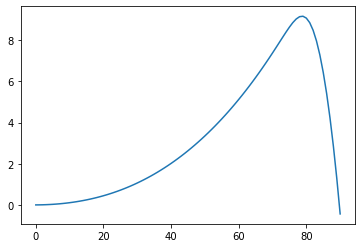

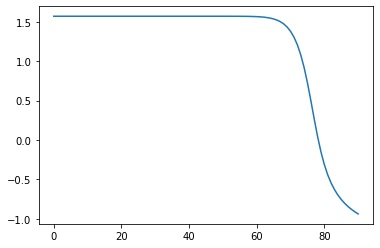

0.01303069303139973

In [13]:
s.get_range()